# Faker: A Multinomial Naive Bayes-based Trustworthy Article Identifier

This project was made by:
- Justin Clyde Frongoso
- Medwin Devilleres
- Rae Gabriel Samonte
- Alquen Antonio Sarmiento

Faker is a chrome extension tool that helps identify if an article contains trustworthy content in the form of a paragraph, phrase, or sentence through the use of the Multinomial Naive Bayes model in predicting the validity of Filipino news articles. This Jupyter notebook is made for documentation and demonstration only.

The steps for the implementation are given below:

## 1. Import Required Libraries

We first import the necessary libraries.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from stops import stop_words

## 2. Import Dataset

We now import the dataset as well as separate the features (in this case, only the article) and the label. The label 0 corresponds to legitimate articles and the label 1 corresponds to fake articles.

In [2]:
path = 'full.csv'
data = pd.read_csv(path)
data.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


We check the split of fake and legitimate articles from the dataset through the use of `value_counts()` method.

In [3]:
count = data.label.value_counts()
count

0    1598
1    1598
Name: label, dtype: int64

We set the key values for the feature `article` and `label` to `X` and `y`, respectively.

In [4]:
X = data['article']
y = data['label']

Determine the average article length to determine the minimum article length to consider for the inputs. A 150-word article (approximately half of the average) was the original minimum but was then reduced to 100 to include most of the articles in the dataset.

In [5]:
lens = 0
for i in X:
    
    cur_len = len(i.split())
    lens += cur_len

print(f"Average Article Length: {lens / count[0]}")

Average Article Length: 365.94180225281605


## 3. Splitting the Dataset (for training and testing)

The data will now be splitted into two sets: the training and test set. Since there are only 3000+ rows, we are splitting the data in a 80:20 split for the training and test set, respectively. Note that the `random_state = 143` is only added to preserve the state in every run of this notebook`.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 143)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2556,)
(640,)
(2556,)
(640,)


## 4. Vectorizing the Dataset

We vectorize the dataset into numerical categories in order to easily categorize and fit them using the model.

In [7]:
vect = CountVectorizer(stop_words = [word for word in stop_words])
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<640x34527 sparse matrix of type '<class 'numpy.int64'>'
	with 53189 stored elements in Compressed Sparse Row format>

## 5. Building the Model

We are using the Multinomial Naive Bayes Classifier as it is suitable for classification of discrete features. It is also computationally efficient and is commonly used for labeling articles and text classification tasks. We also check the accuracu values such as the RMSE and R2 Score and the confusion matrix.

In [8]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [9]:
y_pred_class = nb.predict(X_test_dtm)

In [10]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_class))

Accuracy Score: 0.925


In [11]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       323
           1       0.92      0.92      0.92       317

    accuracy                           0.93       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.93      0.93      0.93       640



Confusion Matrix:

Text(91.68, 0.5, 'true value')

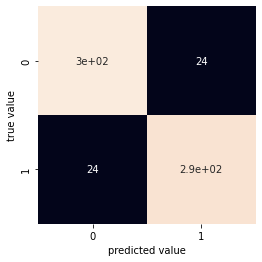

In [12]:
conf = metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [13]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_class)))

RMSE: 0.27386127875258304


In [14]:
print("R2 Score:", metrics.r2_score(y_test, y_pred_class))

R2 Score: 0.6999736304948676


## 6. Predicting Text

Now that we trained the model, it is now time to use it and predict some pieces of text. To begin, input any article and see whether it is trustworthy or not.

In [15]:
def manual_predict(model, vectorizer, text):
    inp_arr = []
    inp_arr.append(text)
    inp_dtm = vectorizer.transform(inp_arr)
    res = model.predict(inp_dtm)[0]
    return res

inp = str(input())
print(manual_predict(nb, vect, inp))

Umaasa ang kampo ni Belmonte na matukoy at mahubaran ng maskara ang tunay na utak ng pananambang kasabay ng pagsasampa ng kaso. Nadakip ng Special Investigation Task Group (SITG) Belmonte noong Sabado ng matunton ng pulisya ang pinagtataguan ng suspek na si Dominador Tumala 62, ng Bgy. Osmena, Zamboaga del Norte. Naniniwala si Belmonte, na susunod na ang utak ng pananambang sa oras na ikanta ni Tumala. Sinabi ng pulisya ang pagkahuli ni Tumala ay magbibigay daan upang malaman ang kung sino ang nag-utos sa kanya upang makamit ng mga biktima ang hustisya. Ipinagharap na ng kasong multiple murder, multiple frustrated murder si Tumala sa provincial prosecutor's office sa Misamis Oriental.
0


## 7. Exporting the Model
We export the model to a binary file that can be imported by the API to be used for prediction.


In [16]:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(nb, f)
with open('vect_pickle', 'wb') as f:
    pickle.dump(vect, f)

In [17]:
with open('model_pickle', 'rb') as f:
    imported_model = pickle.load (f)
with open('vect_pickle', 'rb') as f:
    imported_vect = pickle.load (f)

In [18]:
inp = str(input())
print(manual_predict(imported_model, imported_vect, inp))

Para sa mga magkakapatid na laging nagtatalo lalo na noong bata pa, siguradong naka-relate din kayo sa mala-aso't pusa na pag-aaway nina Bilog at Bunak na viral ngayon! Grabe kasing tatama sa puso ninyo at maibabalik ang iyong nakaraan kaya talagang naging viral ang video ng dalawang magkapatid na ito. Sa sobrang kasikatan ng dalawang magakapatid na ito, dumami ang gumaya sa kanila at gumawa ng parody. Isa na dito si Yaya Dub na talagang nagbabalik na sa pag da-dubsmash. Maaalala nyo na dito sya nag simulang sumikat nung nag million hits ang kanyang dubsmash. Ngayon naman ang viral ay ang magkapatid na Bilog at Bunak. Mapapanood nyo dito ngayon ang soundtrack. Here is the link.
1


## 8. Additional Features
In this section we introduce additional features for the extension. We will use two more models, the SVM model and Logistic Regression, to identify the likelihood that an article is trustworthy or not.

### i. SVM Model

We preprocess the data into numeric categorizations.

In [19]:
vectorizer = TfidfVectorizer(stop_words = [word for word in stop_words])
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

Next is the fitting of the training set and the prediction of the testing set.

In [20]:
classifier = svm.SVC()
classifier.fit(train_features, y_train)
predictions = classifier.predict(test_features)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       323
           1       0.98      0.91      0.94       317

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640



Finally, we export the model into a pickle file so that it would be available for the extension.

In [21]:
import pickle
with open('model_pickle_svm', 'wb') as f:
    pickle.dump(nb, f)
with open('vect_pickle_svm', 'wb') as f:
    pickle.dump(vect, f)
with open('model_pickle_svm', 'rb') as f:
    imported_model_svm = pickle.load (f)
with open('vect_pickle_svm', 'rb') as f:
    imported_vect_svm = pickle.load (f)

### ii. Logistic Regression

We again preprocess the data first into numeric categorizations.

In [22]:
vectorizer = TfidfVectorizer(stop_words = [word for word in stop_words])
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

Next is the fitting of the training set and the prediction of the testing set.

In [23]:
classifier = LogisticRegression()
classifier.fit(train_features, y_train)
predictions = classifier.predict(test_features)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       323
           1       0.97      0.91      0.94       317

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



Finally, we export the model into a pickle file so that it would be available for the extension.

In [24]:
import pickle
with open('model_pickle_logistic_regression', 'wb') as f:
    pickle.dump(nb, f)
with open('vect_pickle_logistic_regression', 'wb') as f:
    pickle.dump(vect, f)
with open('model_pickle_logistic_regression', 'rb') as f:
    imported_model_logistic_regression = pickle.load (f)
with open('vect_pickle_logistic_regression', 'rb') as f:
    imported_vect_logistic_regression = pickle.load (f)

### End of Code